In [1]:
NAME = "Cody Miller"

In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
PPData = pd.read_csv('/home/millerc4/PPData.csv')
PKData = pd.read_csv('/home/millerc4/PKData.csv')
data = pd.read_csv('/home/millerc4/STData.csv')
print(PPData.columns)
print(PPData.head(4))
print(PKData.columns)
print(PKData.head(4))
print(data.columns)
print(data.head(4))

Index(['PP%', 'SemiFinal'], dtype='object')
     PP%  SemiFinal
0  22.90          1
1  22.14          0
2  22.04          1
3  21.25          0
Index(['PK%', 'SemiFinal'], dtype='object')
     PK%  SemiFinal
0  84.69          1
1  85.71          0
2  82.75          1
3  84.14          0
Index(['PP%', 'PK%', 'SemiFinal'], dtype='object')
     PP%    PK%  SemiFinal
0  22.90  84.69          1
1  22.14  85.71          0
2  22.04  82.75          1
3  21.25  84.14          0


In [4]:
ppdf = pd.DataFrame(data = PPData)
pkdf = pd.DataFrame(data = PKData)
df = pd.DataFrame(data = data)

In [5]:
pploc = ppdf.loc[(ppdf["SemiFinal"] == 1)]
pploc["PP%"].mean() - ppdf["PP%"].mean()

0.06504166666666933

In [6]:
pkloc = pkdf.loc[(pkdf["SemiFinal"] == 1)]
pkloc["PK%"].mean() - pkdf["PK%"].mean()

0.4134166666666914

In [7]:
ppdf_melt = ppdf.melt(id_vars = 'SemiFinal', 
                      value_vars = ['PP%'], var_name = 'columns')
pkdf_melt = pkdf.melt(id_vars = 'SemiFinal', 
                      value_vars = ['PK%'], var_name = 'columns')

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


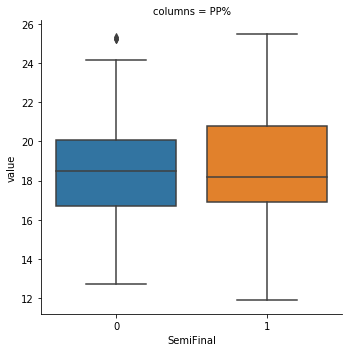

In [8]:
a = sns.factorplot(data = ppdf_melt, 
                  x = 'SemiFinal', y = 'value', 
                  kind = 'box', col = 'columns')
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


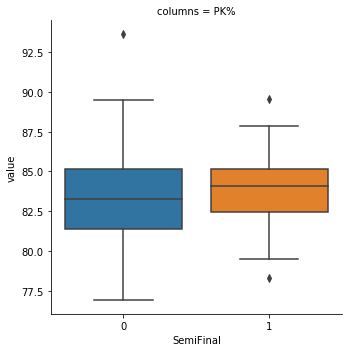

In [9]:
b = sns.factorplot(data = pkdf_melt,
                  x = 'SemiFinal', y = 'value',
                  kind = 'box', col = 'columns')
plt.show()

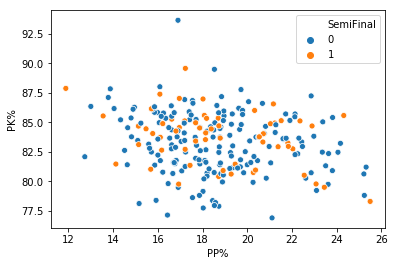

In [10]:
ax = sns.scatterplot(x = "PP%", y = "PK%", hue = "SemiFinal", data = df)
plt.show()

In [11]:
arraypp = ppdf.values
Xpp = arraypp[:,0]
X2pp = Xpp.reshape(-1, 1)
ypp = arraypp[:,1]

In [13]:
from sklearn.model_selection import train_test_split
Xpp_train, Xpp_test, ypp_train, ypp_test = train_test_split(X2pp, ypp, 
                                                           test_size=0.3, 
                                                           random_state=42)
from sklearn.svm import SVC
clfpp = SVC(kernel='linear')
clfpp.fit(Xpp_train, ypp_train)

ypp_pred = clfpp.predict(Xpp_test)

print("Train accuracy is %.2f " % (clfpp.score(Xpp_train, ypp_train)*100))
print("Test accuracy is %.2F " % (clfpp.score(Xpp_test, ypp_test)*100))

Train accuracy is 70.24 
Test accuracy is 86.11 


In [14]:
arraypk = pkdf.values
Xpk = arraypk[:,0]
X2pk = Xpk.reshape(-1, 1)
ypk = arraypk[:,1]

In [15]:
from sklearn.model_selection import train_test_split
Xpk_train, Xpk_test, ypk_train, ypk_test = train_test_split(X2pk, ypk, 
                                                           test_size=0.3, 
                                                           random_state=42)
from sklearn.svm import SVC
clfpk = SVC(kernel='linear')
clfpk.fit(Xpk_train, ypk_train)

ypk_pred = clfpk.predict(Xpk_test)

print("Train accuracy is %.2f " % (clfpk.score(Xpk_train, ypk_train)*100))
print("Test accuracy is %.2F " % (clfpk.score(Xpk_test, ypk_test)*100))

Train accuracy is 70.24 
Test accuracy is 86.11 


In [16]:
array = df.values
X = array[:,:2]
y = array[:,2]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=42)
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Train accuracy is %.2f " % (clf.score(X_train, y_train)*100))
print("Test accuracy is %.2f " % (clf.score(X_test, y_test)*100))

Train accuracy is 70.24 
Test accuracy is 86.11 


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                   random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("Train accuracy is %.2f " % (knn.score(X_train, y_train)*100))
print("Test accuracy is %.2f " % (knn.score(X_test, y_test)*100))

Train accuracy is 79.38 
Test accuracy is 81.25 


In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svc_model = LinearSVC(random_state=0)
pred = svc_model.fit(X_train, y_train).predict(X_test)
print("LinearSVC accuracy : ", accuracy_score(y_test, pred, normalize=True)*100)

LinearSVC accuracy :  85.0
